In [1]:
from fusion import *

In [2]:
net16 = ClassficationNet_block_16()
net16 = get_trained_net(net16,'./save_net/block/block_net_989.pth')

netPixel = ClassficationNet_pixel()
netPixel = get_trained_net(netPixel,'./save_net/pixel/pixel_net_972.pth')

In [3]:
print(device)

cpu


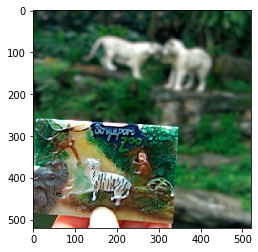

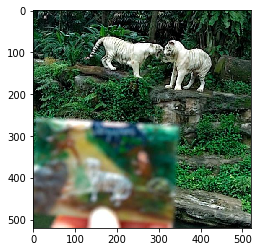

In [4]:
Ia = read_img("./LytroDataset/lytro-13-A.jpg")
Ib = read_img("./LytroDataset/lytro-13-B.jpg")
sacle = 1
Ia_s = cv.resize(Ia,(0,0),fx=sacle,fy=sacle)
Ib_s = cv.resize(Ib,(0,0),fx=sacle,fy=sacle)
show_img([Ia,Ib])

In [5]:
start = time.time()
m16 = get_mask_block(Ia_s,Ib_s,net16,16,paddingx=0,paddingy=0)

print("时间：",time.time()-start)

时间： 1.003549337387085


In [6]:
mm = np.zeros_like(m16)
for i in range(mm.shape[0]-1):
    for j in range(mm.shape[1]-1):
        if m16[i,j,0]!=m16[i+1,j,0]:
            if i-7 < 0:
                st = 0
            else:
                st = i-7
            if i+9>mm.shape[0]:
                end = mm.shape[0]
            else:
                end = i+9
            mm[st:end,j,:]=1

        if m16[i,j,0]!=m16[i,j+1,0]:
            if j-7 < 0:
                st = 0
            else:
                st = j-7
            if j+9>mm.shape[1]:
                end = mm.shape[1]
            else:
                end = j+9
            mm[i,st:end,:]=1

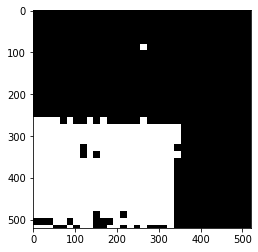

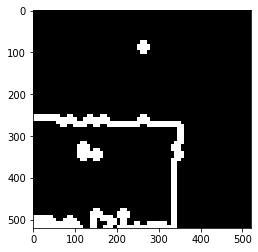

In [7]:
show_img([m16,mm])

In [8]:
start = time.time()
mp = get_mask_pixel(Ia,Ib,netPixel)
print("时间：",time.time()-start)

时间： 52.03782057762146


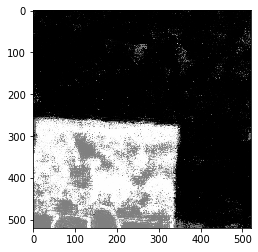

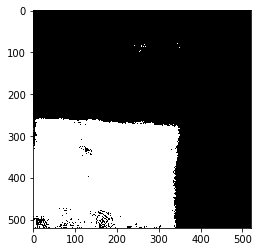

In [9]:
show_img(mp)
mp=(mp>=0.5).astype('float32')
show_img(mp)

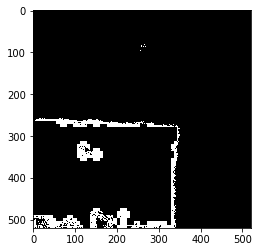

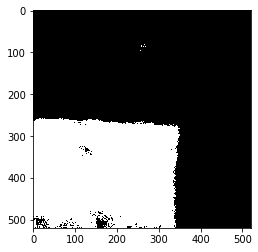

In [10]:
show_img(mp*mm)
m = mp*mm+m16*(1-mm)
show_img(m)

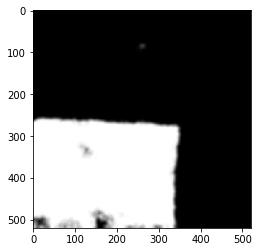

In [11]:
mr = cv.ximgproc.rollingGuidanceFilter(m.astype('float32'),sigmaSpace=4,numOfIter=5)
show_img(mr)
Ir = Ia*mr+Ib*(1-mr)

In [ ]:
for t in range(1,21):
    if t <=9 :
        Ia = read_img('./LytroDataset/lytro-0'+str(t)+'-A.jpg')
        Ib = read_img('./LytroDataset/lytro-0'+str(t)+'-B.jpg')
    else :
        Ia = read_img('./LytroDataset/lytro-'+str(t)+'-A.jpg')
        Ib = read_img('./LytroDataset/lytro-'+str(t)+'-B.jpg')   

    sacle = 1
    Ia_s = cv.resize(Ia,(0,0),fx=sacle,fy=sacle)
    Ib_s = cv.resize(Ib,(0,0),fx=sacle,fy=sacle)

    m16 = get_mask_block(Ia_s,Ib_s,net16,16,paddingx=0,paddingy=0)
    mm = np.zeros_like(m16)
    for i in range(mm.shape[0]-1):
        for j in range(mm.shape[1]-1):
            if m16[i,j,0]!=m16[i+1,j,0]:
                if i-7 < 0:
                    st = 0
                else:
                    st = i-7
                if i+9>mm.shape[0]:
                    end = mm.shape[0]
                else:
                    end = i+9
                mm[st:end,j,:]=1

            if m16[i,j,0]!=m16[i,j+1,0]:
                if j-7 < 0:
                    st = 0
                else:
                    st = j-7
                if j+9>mm.shape[1]:
                    end = mm.shape[1]
                else:
                    end = j+9
                mm[i,st:end,:]=1
    mp = get_mask_pixel(Ia,Ib,netPixel)
    mp=(mp>=0.5).astype('float32')
    m = mp*mm+m16*(1-mm)
    mr = cv.ximgproc.rollingGuidanceFilter(m.astype('float32'),sigmaSpace=4,numOfIter=5)
    Ir = Ia*mr+Ib*(1-mr)
    print(t)
    save_img(Ir,'./fusion_result/'+str(t)+'.jpg')
print("done!!!")

1
2
3
4
5
6
7
